In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

In [5]:
loan = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Features.
**- Categorical Columns.**
- Gender
- Married
- Dependents
- Education
- Self_Employed
- Credit_History
- Property_Area

**- Non-Categorical Columns.**
- Loan_ID
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

## Target.
- Loan_Status

## EDA 

In [3]:
loan.shape

(614, 13)

Shape of our dataset is 614,17

In [6]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**- Description of dataset. (Showing description only for non-categorical columns)**
- Count.
- Mean.
- Standard deviation.
- Mininum
- 1st Quantile (25%)
- 2nd Quantile (50%)
- 3rd Quantile (75%)
- Maximum.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Information of dataset.**
- RangeIndex: 0 to 613
- Data columns: 13
- dtypes: float64(4), int64(1), object(8)
- There are null values present in our dataset.

In [8]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Columns with null values.**
- Gender
- Married
- Dependents
- Self_Employed
- LoanAmount
- Loan_Amount_Term
- Credit_History

**- Filling the null values.**

**Categorical columns with Mode()**

In [10]:
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married'] = loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])

**Non-Categorical columns with Mean()**

In [11]:
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())

In [12]:
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, No Null values present in our dataset.

## Visualisation.

In [13]:
def plot(x,y,data):
    plt.figure()
    plt.scatter(x,y,data=loan)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between LoanAmount and Loan_Status


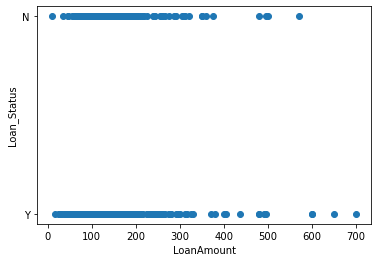

Scatterpot between ApplicantIncome and Loan_Status


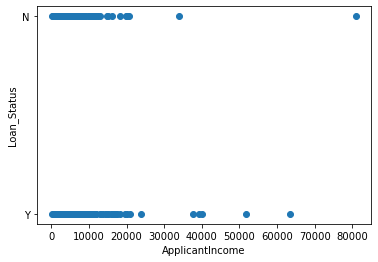

Scatterpot between LoanAmount and Loan_Amount_Term


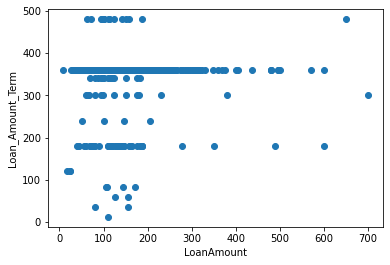

In [22]:
plot('LoanAmount','Loan_Status',data = loan)
plot('ApplicantIncome','Loan_Status',data = loan)
plot('LoanAmount','Loan_Amount_Term',data = loan)

## Encoding.

In [20]:
lb = LabelEncoder()

In [33]:
loan['Gender'] = lb.fit_transform(loan['Gender'])
loan['Married'] = lb.fit_transform(loan['Married'])
loan['Dependents'] = lb.fit_transform(loan['Dependents'])
loan['Education'] = lb.fit_transform(loan['Education'])
loan['Self_Employed'] = lb.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = lb.fit_transform(loan['Property_Area'])
loan['Loan_Status'] = lb.fit_transform(loan['Loan_Status'])

## Normal distribution & Outliers

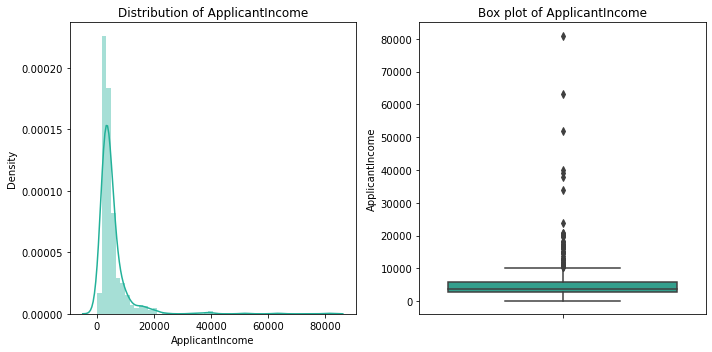

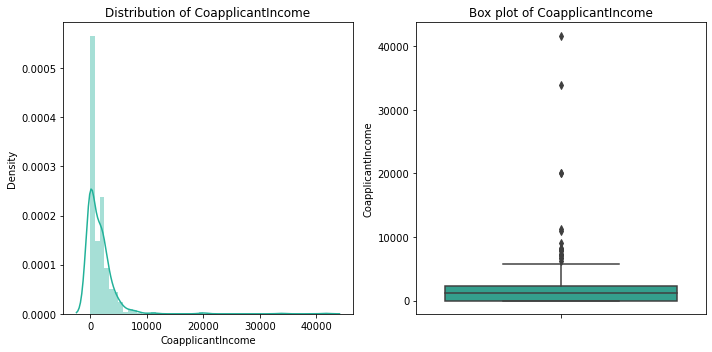

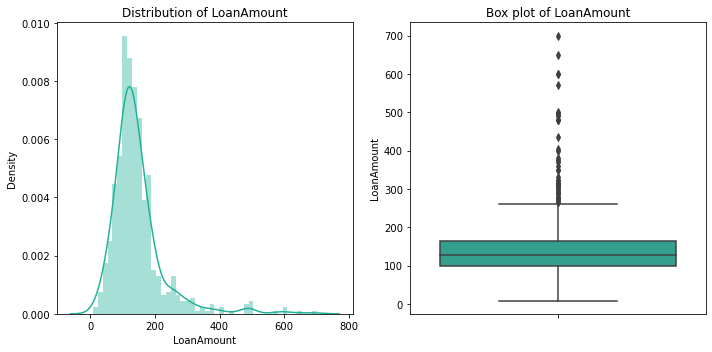

(614, 13)


In [37]:
def check_outliers(x):
    global data
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(loan[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=loan[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of ' + x)
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    check_outliers(i)
    
print(loan.shape)

Outliers and Skewness are present in our dataset, so using IQR to remove them.

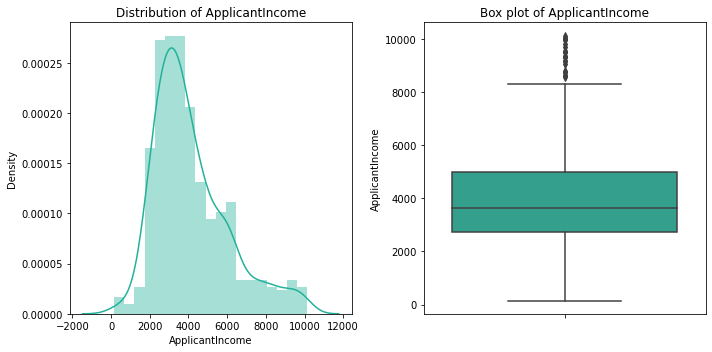

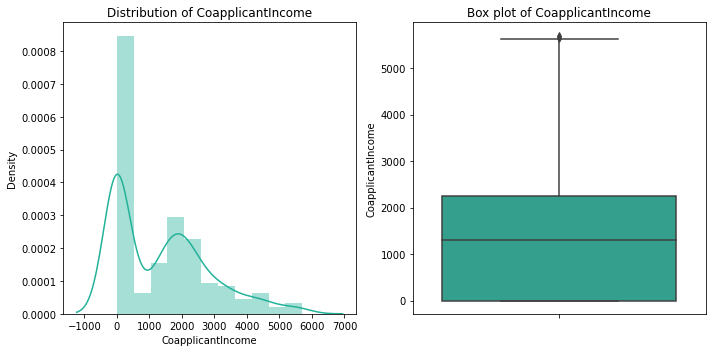

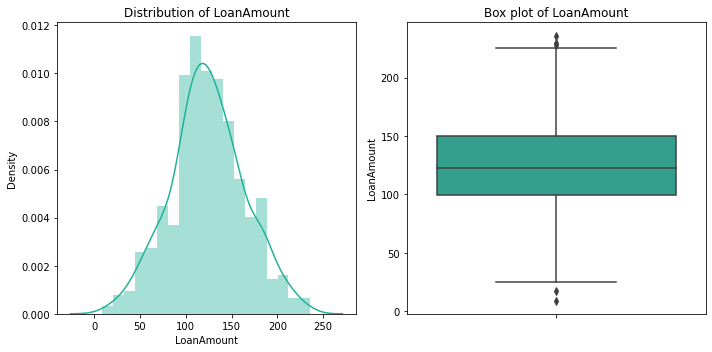

(522, 13)


In [38]:
def remove_outliers(x):
    global loan
    Q1= loan[x].quantile(0.25)
    Q3 = loan[x].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    index = np.where(loan[x] > upper_limit)
    loan = loan.drop(loan.index[index])
    loan.reset_index()
        
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(loan[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=loan[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of '+ x )
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    remove_outliers(i)
print(loan.shape)

Post removing outliers and skewness.

## Correlation.

In [43]:
df = loan.corr()

<AxesSubplot:>

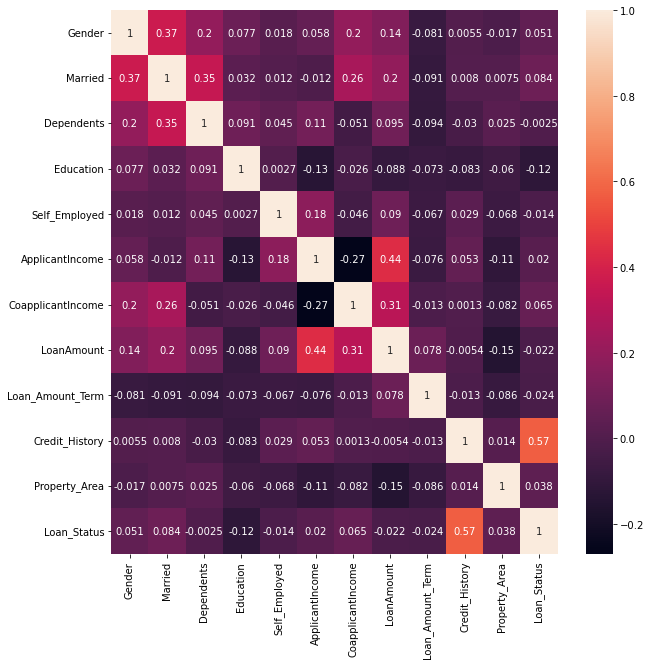

In [44]:
plt.figure(figsize = (10,10))
sns.heatmap(df,annot = True)

No multicollinearity problem present.

## Features Selection.

**- Seperating the Features & Target columns.**

In [50]:
x = loan.drop(columns = ['Loan_Status','Loan_ID'],axis = 1)
y = loan.Loan_Status

**- Using SelectKbest for best features.**

In [54]:
best = SelectKBest(score_func = f_classif, k = 11)
fit = best.fit(x,y)
score = pd.DataFrame(fit.scores_)
column = pd.DataFrame(x.columns)

In [55]:
feat = pd.concat([score,column],axis = 1)
feat.columns = ['Score','Feature']
feat.nlargest(11,'Score')

,Score,Feature
9,250.037278,Credit_History
3,7.110441,Education
1,3.692452,Married
6,2.210632,CoapplicantIncome
0,1.379661,Gender
10,0.741922,Property_Area
8,0.294152,Loan_Amount_Term
7,0.249133,LoanAmount
5,0.207816,ApplicantIncome
4,0.095125,Self_Employed


As Dependents have the least score with our target column so dropping the Dependents column.

**- Final Dataset.**

In [92]:
x.drop('Dependents',axis = 1,inplace = True)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,3232,1950.0,108.000000,360.0,1.0,0
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2


## Training The Model.

**- Using Standard scaler on features to scale the values.**

In [63]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [64]:
x_scaled

array([[ 0.48377945, -1.34967464, -0.71505586, ...,  0.27688578,
         0.41597321,  1.25439361],
       [ 0.48377945,  0.74091931,  0.29648657, ...,  0.27688578,
         0.41597321, -1.28849363],
       [ 0.48377945,  0.74091931, -0.71505586, ...,  0.27688578,
         0.41597321,  1.25439361],
       ...,
       [ 0.48377945,  0.74091931,  2.31957143, ..., -2.44675197,
         0.41597321, -1.28849363],
       [ 0.48377945,  0.74091931,  1.308029  , ...,  0.27688578,
         0.41597321,  1.25439361],
       [-2.06705764, -1.34967464, -0.71505586, ...,  0.27688578,
        -2.40400099, -0.01705001]])

**- Train Test Split.**

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 9)

**- Training & Testing Function.**

In [70]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))

**- Model Instantiating.**

In [75]:
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()

**- KNeighbors Classifier.**

In [73]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8132992327365729

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.83      0.54      0.65       127
           1       0.81      0.95      0.87       264

    accuracy                           0.81       391
   macro avg       0.82      0.74      0.76       391
weighted avg       0.82      0.81      0.80       391


 ----- Confusion matrix ----- 
 [[ 68  59]
 [ 14 250]]

 ----- Test Result ----- 

Accuracy Score: 0.8015267175572519

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.61      0.53      0.57        32
           1       0.85      0.89      0.87        99

    accuracy                           0.80       131
   macro avg       0.73      0.71      0.72       131
weighted avg       0.79      0.80      0.80       131


 ----- Confusion matrix ----- 
 [[17 15]
 [11 88]]


**- GradientBoosting Classifier.**

In [76]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9232736572890026

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       127
           1       0.90      0.99      0.95       264

    accuracy                           0.92       391
   macro avg       0.94      0.89      0.91       391
weighted avg       0.93      0.92      0.92       391


 ----- Confusion matrix ----- 
 [[ 99  28]
 [  2 262]]

 ----- Test Result ----- 

Accuracy Score: 0.8473282442748091

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.73      0.59      0.66        32
           1       0.88      0.93      0.90        99

    accuracy                           0.85       131
   macro avg       0.80      0.76      0.78       131
weighted avg       0.84      0.85      0.84       131


 ----- Confusion matrix ----- 
 [[19 13]
 [ 7 92]]


**- RandomForest Classifier.**

In [77]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 1.0

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       264

    accuracy                           1.00       391
   macro avg       1.00      1.00      1.00       391
weighted avg       1.00      1.00      1.00       391


 ----- Confusion matrix ----- 
 [[127   0]
 [  0 264]]

 ----- Test Result ----- 

Accuracy Score: 0.8396946564885496

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.72      0.56      0.63        32
           1       0.87      0.93      0.90        99

    accuracy                           0.84       131
   macro avg       0.79      0.75      0.76       131
weighted avg       0.83      0.84      0.83       131


 ----- Confusion matrix ----- 
 [[18 14]
 [ 7 92]]


**- AdaBoost Classifier.**

In [78]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8593350383631714

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.88      0.65      0.75       127
           1       0.85      0.96      0.90       264

    accuracy                           0.86       391
   macro avg       0.87      0.81      0.83       391
weighted avg       0.86      0.86      0.85       391


 ----- Confusion matrix ----- 
 [[ 83  44]
 [ 11 253]]

 ----- Test Result ----- 

Accuracy Score: 0.8702290076335878

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.83      0.59      0.69        32
           1       0.88      0.96      0.92        99

    accuracy                           0.87       131
   macro avg       0.85      0.78      0.80       131
weighted avg       0.87      0.87      0.86       131


 ----- Confusion matrix ----- 
 [[19 13]
 [ 4 95]]


    *** AdaBoostClassifier & GradientBoostingClassifier, are giving the best accuracy score. ***

## Hyperparameter Tuning

**- AdaBoost Classifier.**

In [80]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [83]:
param = {'algorithm': ['SAMME', 'SAMME.R'],
         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
         'n_estimators': [10, 50, 100, 500],
         'random_state': range(1,100,10)
        }

In [89]:
grid = GridSearchCV(ada, param_grid = param)
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 0.0001,
 'n_estimators': 10,
 'random_state': 1}

In [86]:
ada_hyp = AdaBoostClassifier(algorithm = 'SAMME',learning_rate = 0.0001,n_estimators = 10, random_state = 1)

In [88]:
ada_hyp.fit(x_train,y_train)
score(ada_hyp, x_train,x_test,y_train,y_test,train = False)


 ----- Test Result ----- 

Accuracy Score: 0.8931297709923665

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      0.56      0.72        32
           1       0.88      1.00      0.93        99

    accuracy                           0.89       131
   macro avg       0.94      0.78      0.83       131
weighted avg       0.91      0.89      0.88       131


 ----- Confusion matrix ----- 
 [[18 14]
 [ 0 99]]


    *** Post tuning score are better then the previous one, so taking these parameters as the final model. ***

**- GradientBoosting Classifier.**

In [95]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [96]:
param = {'n_estimators':range(10,100,10),
         'learning_rate':[0.1,0.5,1.0],
         'criterion':['friedman_mse','squared_error', 'mse'],
         'random_state':range(10,100,10)}

In [97]:
grid = GridSearchCV(gb, param_grid = param)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'n_estimators': 40,
 'random_state': 40}

In [98]:
gb_hyp = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.1, n_estimators = 40, random_state = 40)

In [100]:
gb_hyp.fit(x_train,y_train)
score(gb_hyp, x_train,x_test,y_train,y_test,train = False)


 ----- Test Result ----- 

Accuracy Score: 0.8854961832061069

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.90      0.59      0.72        32
           1       0.88      0.98      0.93        99

    accuracy                           0.89       131
   macro avg       0.89      0.79      0.82       131
weighted avg       0.89      0.89      0.88       131


 ----- Confusion matrix ----- 
 [[19 13]
 [ 2 97]]


    *** Post tuning score are better then the previous one, so taking these parameters as the final model. ***

**- Saving Model of AdaBoost Classifier.**

In [102]:
filename = 'loan_ada.pickle'
pickle.dump(ada_hyp, open(filename, 'wb'))

**- Saving Model of GradientBoost Classifier.**

In [103]:
filename = 'ada_gb.pickle'
pickle.dump(gb_hyp, open(filename, 'wb'))